In [1]:
%load_ext autoreload
%autoreload 2
from src.generator.generator import Generator
from PIL import Image
from src.face_frame import face_frame_correction
import torch
from src.nets.MobileNetV2_unet import MobileNetV2_unet
from torchvision import transforms
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import src.face_frame as face_frame

In [2]:
gen = Generator("https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-256x256.pkl")

In [3]:
target_pil = Image.open("/app/ref.png")
target_pil = target_pil.convert('RGB')
output = Image.open("/app/ref.png")
output = output.convert('RGB')

In [6]:
model = MobileNetV2_unet(None).to(torch.device("cuda"))
state_dict = torch.load('./src/checkpoints/model.pt', map_location='cuda')
model.load_state_dict(state_dict)
model.eval()
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

In [21]:
ws = face_frame_correction(target_pil, None, gen.G, gen.device)

step    1/100: dist 0.35 loss 0.35 
step    2/100: dist 0.30 loss 0.30 
step    3/100: dist 0.48 loss 0.48 
step    4/100: dist 0.15 loss 0.15 
step    5/100: dist 0.51 loss 0.51 
step    6/100: dist 0.28 loss 0.28 
step    7/100: dist 0.58 loss 0.58 
step    8/100: dist 0.38 loss 0.38 
step    9/100: dist 0.32 loss 0.32 
step   10/100: dist 0.37 loss 0.37 
step   11/100: dist 0.21 loss 0.21 
step   12/100: dist 0.25 loss 0.25 
step   13/100: dist 0.24 loss 0.24 
step   14/100: dist 0.22 loss 0.22 
step   15/100: dist 0.30 loss 0.30 
step   16/100: dist 0.33 loss 0.33 
step   17/100: dist 0.26 loss 0.26 
step   18/100: dist 0.29 loss 0.29 
step   19/100: dist 0.29 loss 0.29 
step   20/100: dist 0.20 loss 0.20 
step   21/100: dist 0.20 loss 0.20 
step   22/100: dist 0.23 loss 0.23 
step   23/100: dist 0.25 loss 0.25 
step   24/100: dist 0.18 loss 0.18 
step   25/100: dist 0.20 loss 0.20 
step   26/100: dist 0.28 loss 0.28 
step   27/100: dist 0.23 loss 0.23 
step   28/100: dist 0.20 los

In [22]:
print(ws.shape)

torch.Size([100, 16, 512])


0


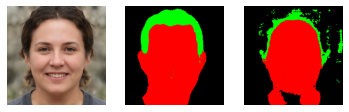

1


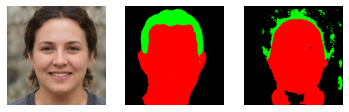

2


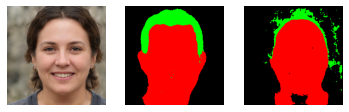

3


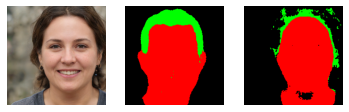

4


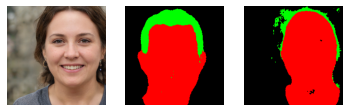

5


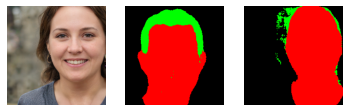

6


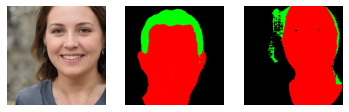

7


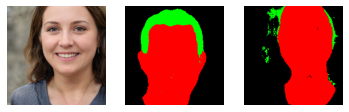

8


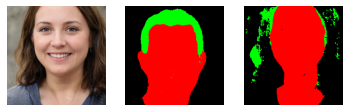

9


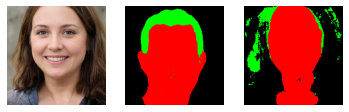

10


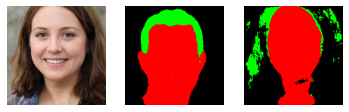

11


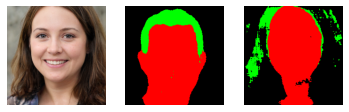

12


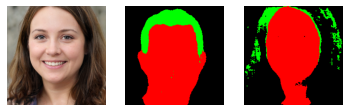

13


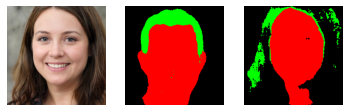

14


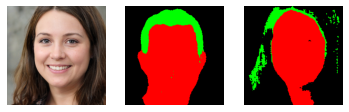

15


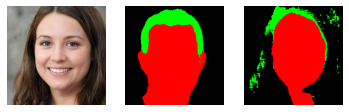

16


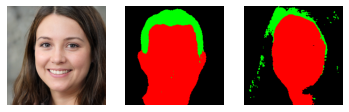

17


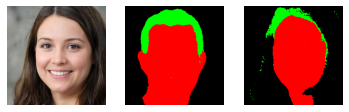

18


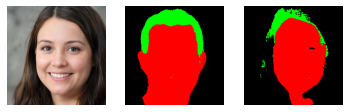

19


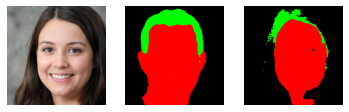

20


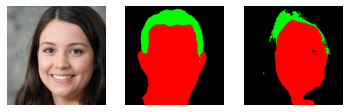

21


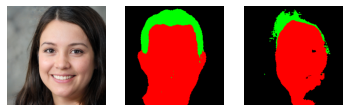

22


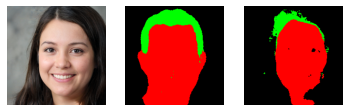

23


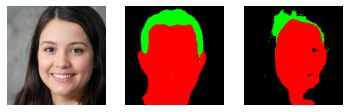

24


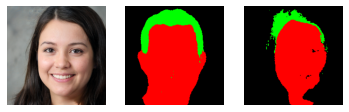

25


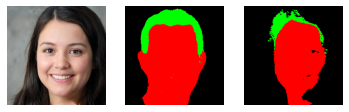

26


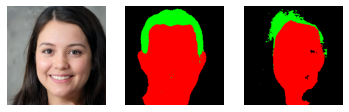

27


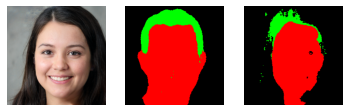

28


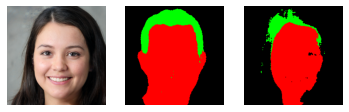

29


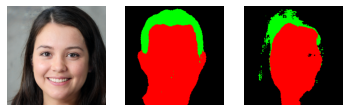

30


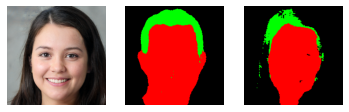

31


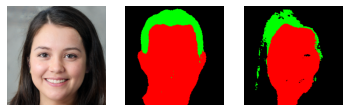

32


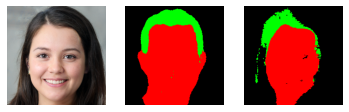

33


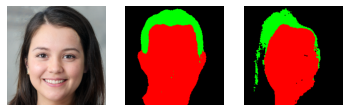

34


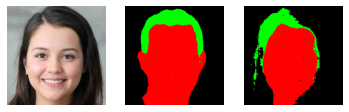

35


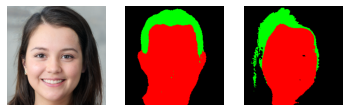

36


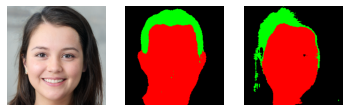

37


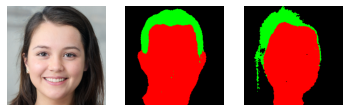

38


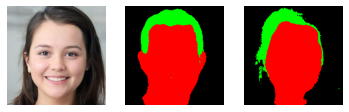

39


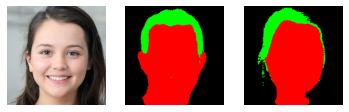

40


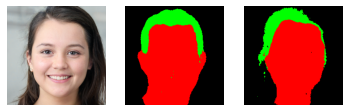

41


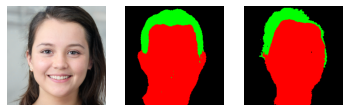

42


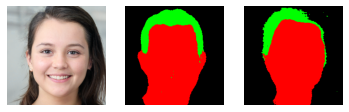

43


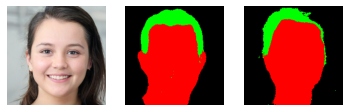

44


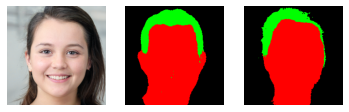

45


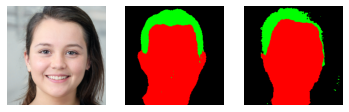

46


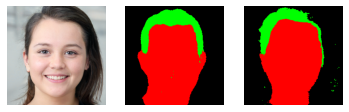

47


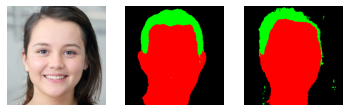

48


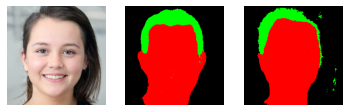

49


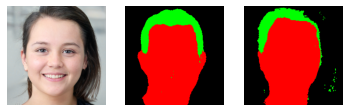

50


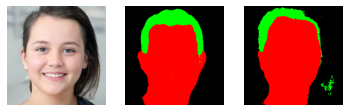

51


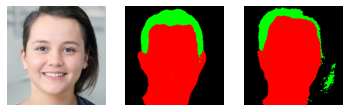

52


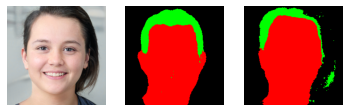

53


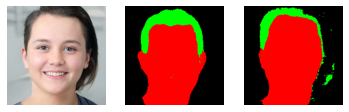

54


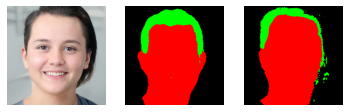

55


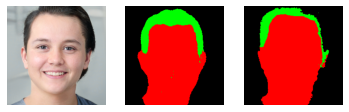

56


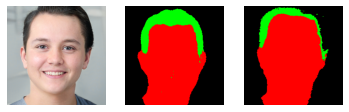

57


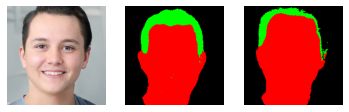

58


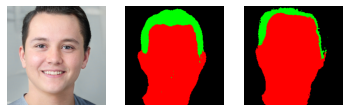

59


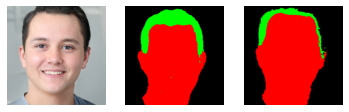

60


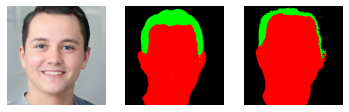

61


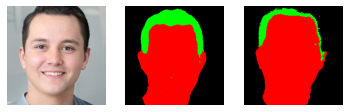

62


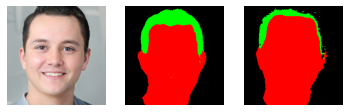

63


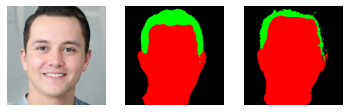

64


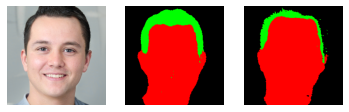

65


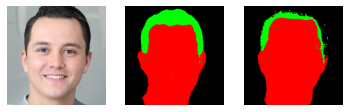

66


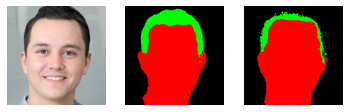

67


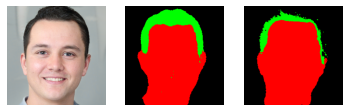

68


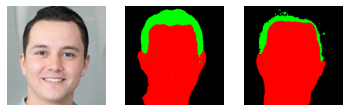

69


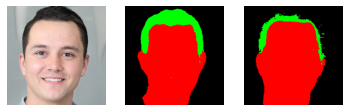

70


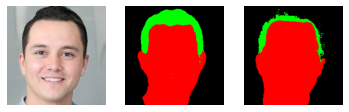

71


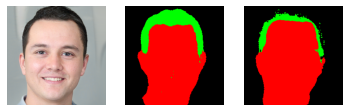

72


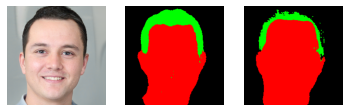

73


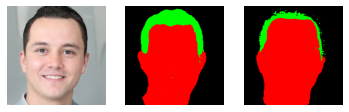

74


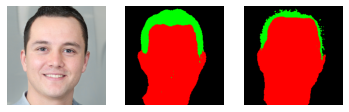

75


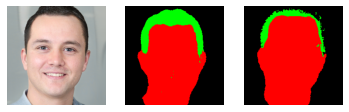

76


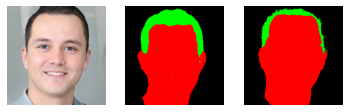

77


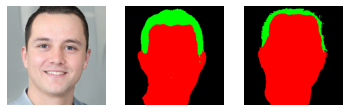

78


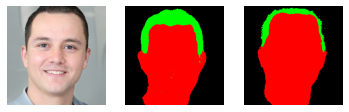

79


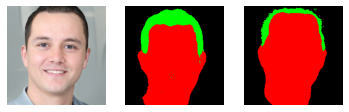

80


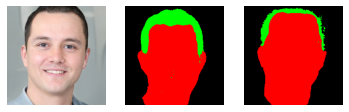

81


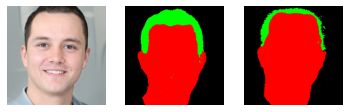

82


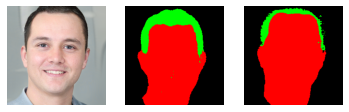

83


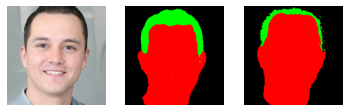

84


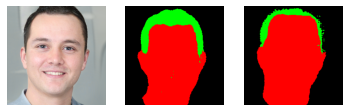

85


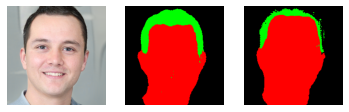

86


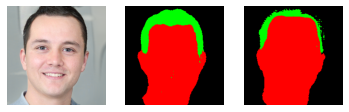

87


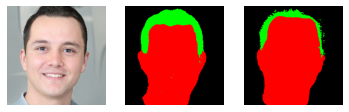

88


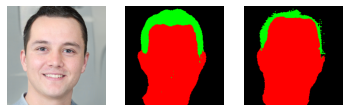

89


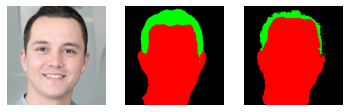

90


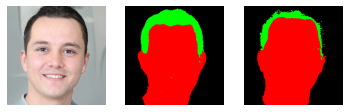

91


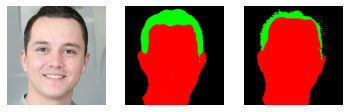

92


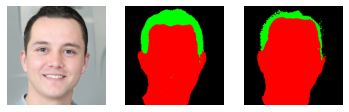

93


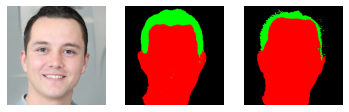

94


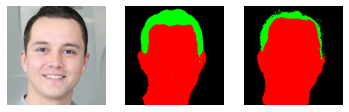

95


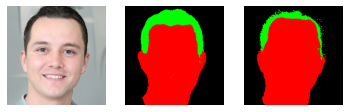

96


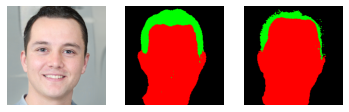

97


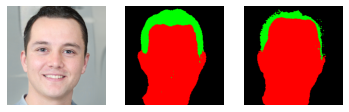

98


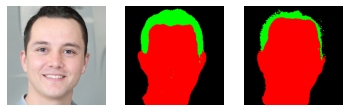

99


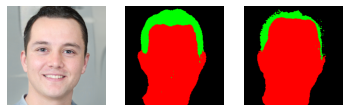

In [23]:
target_mask = face_frame.create_segmentation_mask(model, target_pil)
def plot_mask(mask):
    mask = mask.argmax(dim=1)
    mask = mask.squeeze(0)
    colors = np.array([[0, 0, 0], [255, 0, 0], [0, 255, 0]])
    mask = mask.cpu().numpy()
    mask = colors[mask]
    plt.imshow(mask)
for i,w in enumerate(ws):
    
    #plot image
    print(i)
    plt.subplot(1, 3, 1)
    plt.axis('off')
    _w = w.unsqueeze(0)
    img_gen = gen.G.synthesis(_w, noise_mode='const')
    img = (img_gen.permute(0, 2, 3, 1) * 127.5 +
                    128).clamp(0, 255).to(torch.uint8)
    img = img[0].cpu().numpy()
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.axis('off')
    #plot target mask
    plot_mask(target_mask)
    plt.subplot(1, 3, 3)
    plt.axis('off')
    mask = face_frame.create_segmentation_mask_from_network(model, img_gen)
    plot_mask(mask)

    plt.show()